In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,74.981605,37.173007,35.473792,18.886004,84.443365,7.097512,231.756205,Almonds
1,98.028572,48.427664,49.043184,20.206120,75.814981,5.846184,225.484858,Almonds
2,89.279758,49.671028,35.779569,23.982253,86.229679,7.316914,289.807288,Almonds
3,83.946339,53.635987,43.119445,25.356631,79.763802,5.851612,210.140312,Almonds
4,66.240746,45.791489,45.635908,27.983475,75.002020,6.511620,281.305479,Almonds


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
700,84.789,50.123,44.234,25.567,81.789,5.789,183.234,tropical Fruit
701,85.456,51.789,45.345,26.678,82.890,5.890,184.345,tropical Fruit
702,86.123,52.456,46.456,27.789,83.901,5.901,185.456,tropical Fruit
703,87.789,53.123,47.567,28.890,84.012,6.012,186.567,tropical Fruit
704,88.456,54.789,48.678,29.901,85.123,6.123,187.678,tropical Fruit


In [5]:
df.size

5640

In [6]:
df.shape

(705, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['Almonds', 'Anise', 'Apples', 'Apricots', 'Artichokes',
       'Asparagus', 'Avocados', 'Badian', 'Barley', 'Beans',
       'Beans green', 'Berries nes', 'Broad Beans',
       'Cabbages and other brassicas', 'Carobs', 'Carrots and turnips',
       'Cauliflowers and broccoli', 'Cereals', 'Cereals nes', 'Cherries',
       'Chick peas', 'Chillies', 'Clementines', 'Cranberries',
       'Cucumbers and gherkins', 'Dates', 'Eggplants (aubergines)',
       'Fennel', 'Fibre Crops Primary', 'Figs', 'Fruit Primary', 'Garlic',
       'Grapefruit', 'Grapes', 'Hazelnuts', 'Horse beans', 'Kiwi fruit',
       'Leguminous', 'Lemons', 'Lentils', 'Lettuce and chicory', 'Limes',
       'Linseed', 'Mandarins', 'Melons', 'Mushrooms and truffles',
       'Nuts nes', 'Oats', 'Oilcrops', 'Olives', 'Onions', 'Oranges',
       'Papayas', 'Peaches and nectarines', 'Pears', 'Peas', 'Pistachios',
       'Plums and sloes', 'Potatoes', 'Pulses', 'Pulses nes', 'Pumpkins',
       'Pyrethrum', 'Quinces', 'Rapesee

In [9]:
df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

Fennel         10
Pyrethrum      10
Pears          10
Nuts nes       10
Badian         10
               ..
Tobacco         5
Treenuts        5
Vegetables      5
Triticale       5
Watermelons     5
Name: label, Length: 76, dtype: int64

<AxesSubplot:>

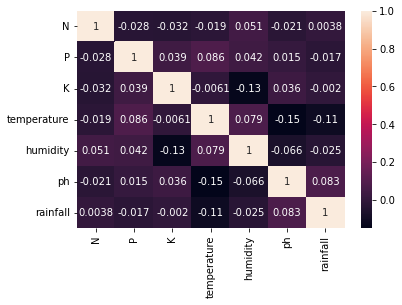

In [11]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [12]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [13]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  4.25531914893617
                        precision    recall  f1-score   support

               Almonds       0.00      0.00      0.00         2
                 Anise       0.00      0.00      0.00         5
                Apples       0.00      0.00      0.00         1
              Apricots       0.00      0.00      0.00         3
            Artichokes       0.00      0.00      0.00         1
             Asparagus       0.00      0.00      0.00         1
              Avocados       0.00      0.00      0.00         3
                Badian       0.00      0.00      0.00         1
                Barley       0.00      0.00      0.00         3
           Beans green       0.00      0.00      0.00         3
           Berries nes       0.00      0.00      0.00         1
           Broad Beans       0.00      0.00      0.00         2
                Carobs       0.09      0.33      0.14         3
   Carrots and turnips       0.00      0.00      0.00   

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [18]:
score

array([0.0070922 , 0.04964539, 0.06382979, 0.04964539, 0.0070922 ])

### Saving trained Decision Tree model

In [19]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.05673758865248227
                              precision    recall  f1-score   support

                     Almonds       0.00      0.00      0.00         2
                       Anise       0.00      0.00      0.00         5
                      Apples       0.00      0.00      0.00         1
                    Apricots       0.00      0.00      0.00         3
                  Artichokes       0.00      0.00      0.00         1
                   Asparagus       0.00      0.00      0.00         1
                    Avocados       0.00      0.00      0.00         3
                      Badian       0.00      0.00      0.00         1
                      Barley       0.00      0.00      0.00         3
                       Beans       0.00      0.00      0.00         0
                 Beans green       0.00      0.00      0.00         3
                 Berries nes       0.00      0.00      0.00         1
                 Broad Beans       0.00  

In [21]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.0070922 , 0.09219858, 0.07801418, 0.09219858, 0.0212766 ])

### Saving trained Guassian Naive Bayes model

In [22]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.07801418439716312
                              precision    recall  f1-score   support

                     Almonds       0.00      0.00      0.00         2
                       Anise       0.00      0.00      0.00         5
                      Apples       0.00      0.00      0.00         1
                    Apricots       0.00      0.00      0.00         3
                  Artichokes       0.00      0.00      0.00         1
                   Asparagus       0.00      0.00      0.00         1
                    Avocados       0.00      0.00      0.00         3
                      Badian       0.00      0.00      0.00         1
                      Barley       0.00      0.00      0.00         3
                       Beans       0.00      0.00      0.00         0
                 Beans green       0.00      0.00      0.00         3
                 Berries nes       0.00      0.00      0.00         1
                 Broad Beans       0.00      0.00

In [24]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.       , 0.       , 0.0070922, 0.0141844, 0.0070922])

In [25]:
#Saving trained SVM model

In [26]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.05673758865248227
                              precision    recall  f1-score   support

                     Almonds       0.00      0.00      0.00         2
                       Anise       0.00      0.00      0.00         5
                      Apples       0.00      0.00      0.00         1
                    Apricots       0.00      0.00      0.00         3
                  Artichokes       0.00      0.00      0.00         1
                   Asparagus       0.00      0.00      0.00         1
                    Avocados       0.00      0.00      0.00         3
                      Badian       0.00      0.00      0.00         1
                      Barley       0.00      0.00      0.00         3
                       Beans       0.00      0.00      0.00         0
                 Beans green       0.00      0.00      0.00         3
                 Berries nes       0.00      0.00      0.00         1
                 Broad Beans     

In [28]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.07801418, 0.07092199, 0.07092199, 0.07092199, 0.07801418])

### Saving trained Logistic Regression model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.06382978723404255
                              precision    recall  f1-score   support

                     Almonds       0.00      0.00      0.00         2
                       Anise       0.00      0.00      0.00         5
                      Apples       0.00      0.00      0.00         1
                    Apricots       0.00      0.00      0.00         3
                  Artichokes       0.00      0.00      0.00         1
                   Asparagus       0.00      0.00      0.00         1
                    Avocados       0.50      0.33      0.40         3
                      Badian       0.00      0.00      0.00         1
                      Barley       0.00      0.00      0.00         3
                       Beans       0.00      0.00      0.00         0
                 Beans green       0.00      0.00      0.00         3
                 Berries nes       0.00      0.00      0.00         1
                 Broad Beans       0.00      0.00 

In [31]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.04255319, 0.11347518, 0.08510638, 0.07801418, 0.07801418])

### Saving trained Random Forest model

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

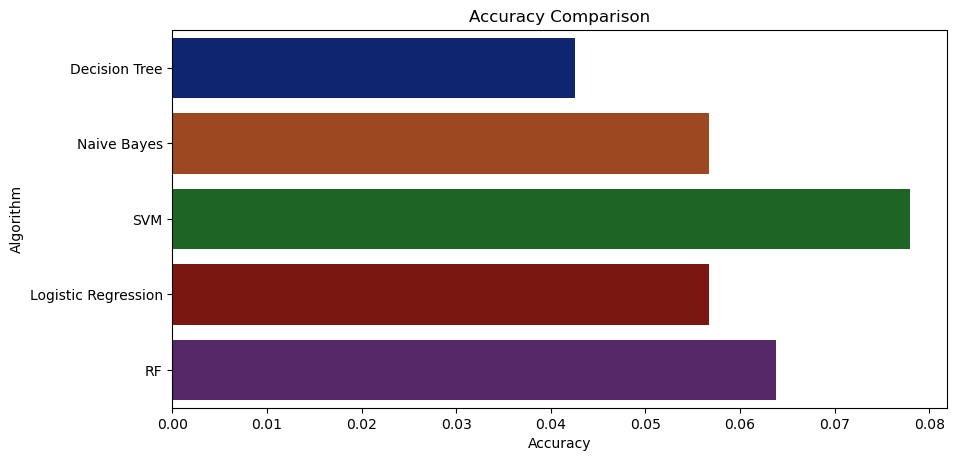

In [33]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [34]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.0425531914893617
Naive Bayes --> 0.05673758865248227
SVM --> 0.07801418439716312
Logistic Regression --> 0.05673758865248227
RF --> 0.06382978723404255


## Making a prediction

In [35]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['Dates']


In [36]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['Oranges']
